In [ ]:
# Import google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string


import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English

In [ ]:
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
os.chdir('/content/drive/MyDrive/Mini-Project II Text Summarization')

## Read the data

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual path)

df = pd.read_csv('news_summary_more.csv')

# Check the first few rows of the dataset
df.head()

,headlines,text
0,upGrad learner switches to career in ML & Al with 90% salary hike,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ..."
1,Delhi techie wins free food from Swiggy for one year on CRED,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi..."
2,New Zealand end Rohit Sharma-led India's 12-match winning streak,New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's capt...
3,Aegon life iTerm insurance plan helps customers save tax,"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, cust..."
4,"Have known Hirani for yrs, what if MeToo claims are not true: Sonam","Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""I..."


In [ ]:
# Check the shape of the dataset
print(df.shape)

(98401, 2)


In [ ]:
df.isnull().sum()

headlines    0
text         0
dtype: int64

# Clean the data

## Contraction Mapping

In [ ]:

## Create a dictionary to map all the contractions

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


## Clean the Text column

In [ ]:
# Define a function to clean the text and the headlines column

stop_words = set(stopwords.words('english'))

def cleaned_text(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()

### View the cleaned data

In [ ]:
df["clean_text"] = df["text"].apply(cleaned_text)

In [ ]:
df["clean_headlines"] = df["headlines"].apply(cleaned_text)

In [ ]:
df.head()

,headlines,text,clean_text,clean_headlines
0,upGrad learner switches to career in ML & Al with 90% salary hike,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",saurav kant alumnus upgrad iiit program machine learning artificial intelligence systems engineer infosys almost years work experience program upgrad degree career support helped transition data s...,upgrad learner switches career salary hike
1,Delhi techie wins free food from Swiggy for one year on CRED,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bi...,delhi techie wins free food swiggy one year cred
2,New Zealand end Rohit Sharma-led India's 12-match winning streak,New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's capt...,new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march ...,new zealand end rohit sharma led india match winning streak
3,Aegon life iTerm insurance plan helps customers save tax,"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, cust...",aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental deat...,aegon life iterm insurance plan helps customers save tax
4,"Have known Hirani for yrs, what if MeToo claims are not true: Sonam","Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""I...",speaking sexual harassment allegations rajkumar hirani sonam kapoor said known hirani many years true metoo movement get derailed metoo movement always believe woman case need reserve judgment add...,known hirani yrs metoo claims true sonam


## Visualize the Clean text column

In [ ]:
import collections
from collections import Counter
from itertools import chain


# Print the tokenized text

df1 = df.copy()

word_tokenize = nltk.word_tokenize

# Tokenize the text column
df1['Tokenized_Text'] = df['clean_text'].apply(word_tokenize)

corpus = df1['Tokenized_Text'].tolist()

# Flatten list of lists to a single list
tokens = list(chain(*corpus))
unique_freq = collections.Counter(tokens)

# Count each unique element
unique_freq_df = pd.DataFrame.from_dict(unique_freq, orient='index').reset_index() # Convert to dataframe

# Rename columns
unique_freq_df = unique_freq_df.rename(columns={'index': 'Token', 0: 'Count'})

# Sort by count
unique_freq_df.sort_values('Count', ascending=False, inplace=True)
print(len(unique_freq_df))
unique_freq_df = unique_freq_df.head(20)

unique_freq_df1 = unique_freq_df.reset_index(drop=True)
unique_freq_df2 = unique_freq_df1.set_index("Token")
unique_freq_df2

75849


,Count
Token,
said,53873
india,18445
year,18026
added,17565
also,14316
first,11634
government,11218
police,11113
people,10943


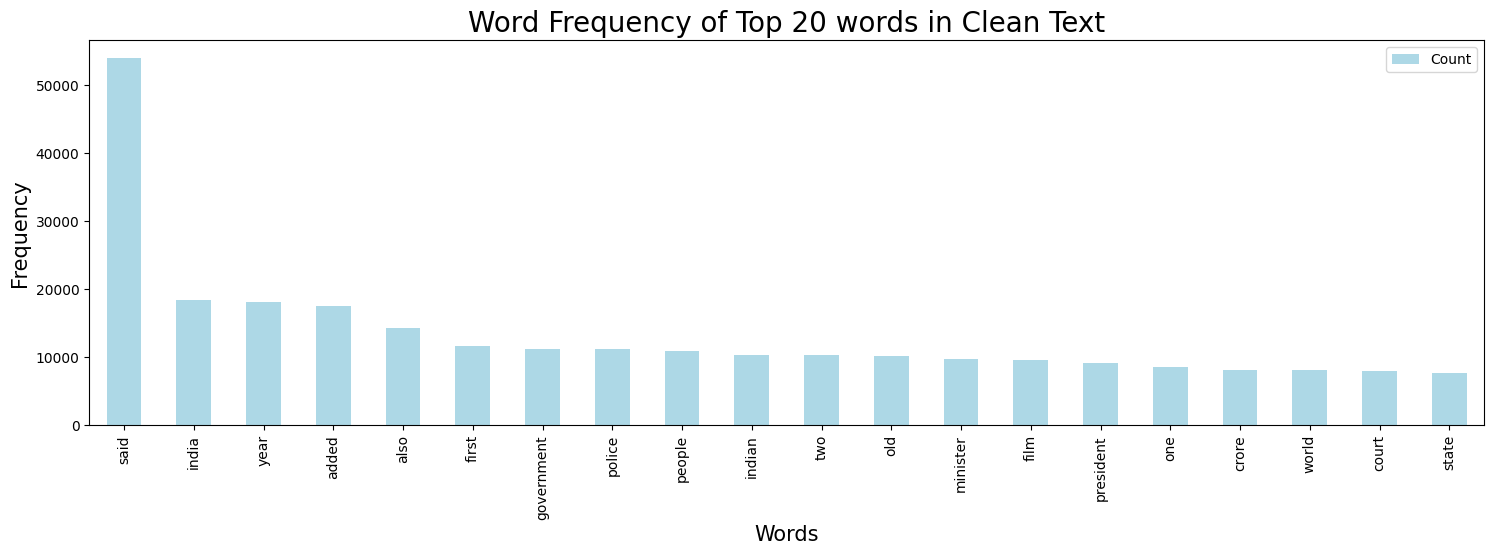

In [ ]:
# Plot the top 20 word frequencies
#plt.colormaps()
unique_freq_df2.plot(kind="bar", figsize= (18,5), grid=False, color = "lightblue")
plt.title("Word Frequency of Top 20 words in Clean Text", size = 20)
plt.xlabel("Words", size =15)
plt.ylabel("Frequency", size=15)
plt.show()

## Word cloud for Clean text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


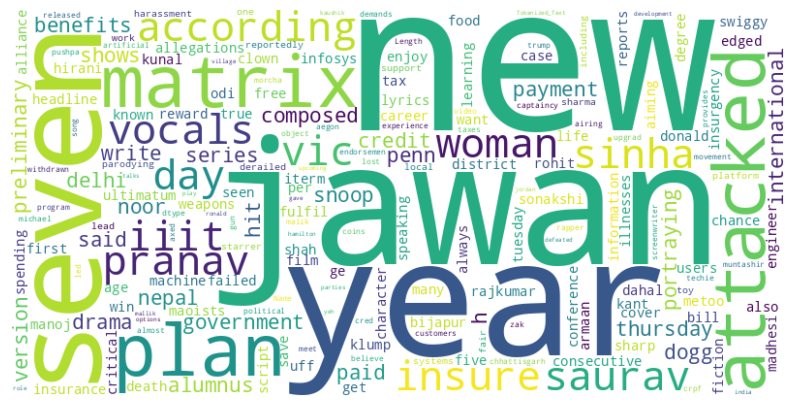

In [ ]:
# Generate a word cloud for df["Clean_text"]

from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_tokenize = nltk.word_tokenize

# Tokenize the text column
df1['Tokenized_Text'] = df['clean_text'].apply(word_tokenize)

corpus = df1['Tokenized_Text'].tolist()

# Download the nltk stopwords if you haven't done so
nltk.download('stopwords')

# Create a set of stopwords
stop_words = set(stopwords.words('english'))

# Split the text into words and remove duplicates
word_list = str(df1["Tokenized_Text"]).split()

unique_words =set(word_list)

# Create a new text string with unique words
unique_text = " ".join(unique_words)

# Generate a word cloud with stop words
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(unique_text)

# plot the graph
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualize the Clean Headlines

In [ ]:
import collections
from collections import Counter
from itertools import chain


# Print the tokenized text

df1 = df.copy()

word_tokenize = nltk.word_tokenize

# Tokenize the text column
df1['Tokenized_Headlines'] = df['clean_headlines'].apply(word_tokenize)

corpus = df1['Tokenized_Headlines'].tolist()

# Flatten list of lists to a single list
tokens = list(chain(*corpus))
unique_freq = collections.Counter(tokens)

# Count each unique element
unique_freq_df = pd.DataFrame.from_dict(unique_freq, orient='index').reset_index() # Convert to dataframe

# Rename columns
unique_freq_df = unique_freq_df.rename(columns={'index': 'Token', 0: 'Count'})

# Sort by count
unique_freq_df.sort_values('Count', ascending=False, inplace=True)
print(len(unique_freq_df))

unique_freq_df = unique_freq_df.head(20)

unique_freq_df1 = unique_freq_df.reset_index(drop=True)
unique_freq_df2 = unique_freq_df1.set_index("Token")
unique_freq_df2

32095


,Count
Token,
india,5716
man,3330
govt,2759
old,2402
delhi,2373
world,2315
indian,2287
trump,2282
bjp,2170


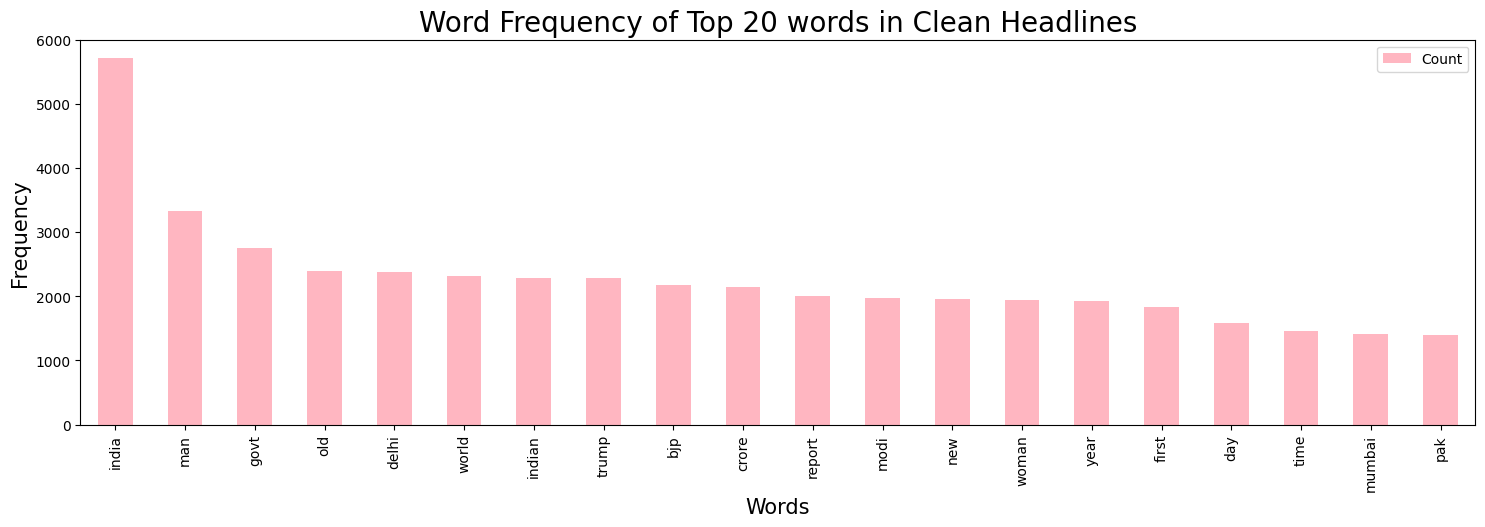

In [ ]:
# Plot the frequencies of the top 20 tokens from the Headlines data

#plt.colormaps()
unique_freq_df2.plot(kind="bar", figsize= (18,5), grid=False, color = "lightpink")
plt.title("Word Frequency of Top 20 words in Clean Headlines", size = 20)
plt.xlabel("Words", size =15)
plt.ylabel("Frequency", size=15)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


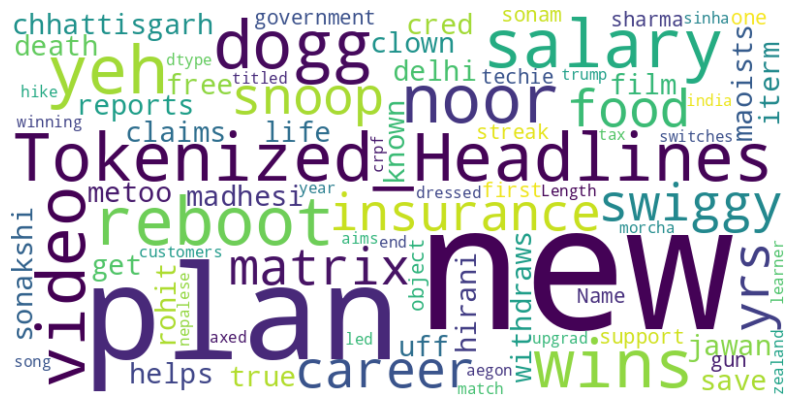

In [ ]:
# Generate a word cloud for df["Clean_headlines"]

from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Print the tokenized text

df1 = df.copy()

word_tokenize = nltk.word_tokenize

# Tokenize the text column
df1['Tokenized_Headlines'] = df['clean_headlines'].apply(word_tokenize)


# Download the nltk stopwords if you haven't done so
nltk.download('stopwords')

# Create a set of stopwords
stop_words = set(stopwords.words('english'))

# Split the text into words and remove duplicates
word_list = str(df1["Tokenized_Headlines"]).split()

unique_words =set(word_list)

# Create a new text string with unique words
unique_text = " ".join(unique_words)

# Generate a word cloud with stop words
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(unique_text)

# plot the graph
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Preprocessing for Modelling

## Word count distribution for both clean text and clean headlines

In [ ]:
df2 = df1.copy()
df2['text_length'] = df2['clean_text'].str.split().apply(len)
df2['summary_length'] = df2['clean_headlines'].str.split().apply(len)
df2.head()




,headlines,text,clean_text,clean_headlines,Tokenized_Headlines,text_length,summary_length
0,upGrad learner switches to career in ML & Al with 90% salary hike,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",saurav kant alumnus upgrad iiit program machine learning artificial intelligence systems engineer infosys almost years work experience program upgrad degree career support helped transition data s...,upgrad learner switches career salary hike,"[upgrad, learner, switches, career, salary, hike]",37,6
1,Delhi techie wins free food from Swiggy for one year on CRED,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bi...,delhi techie wins free food swiggy one year cred,"[delhi, techie, wins, free, food, swiggy, one, year, cred]",45,9
2,New Zealand end Rohit Sharma-led India's 12-match winning streak,New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's capt...,new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march ...,new zealand end rohit sharma led india match winning streak,"[new, zealand, end, rohit, sharma, led, india, match, winning, streak]",38,10
3,Aegon life iTerm insurance plan helps customers save tax,"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, cust...",aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental deat...,aegon life iterm insurance plan helps customers save tax,"[aegon, life, iterm, insurance, plan, helps, customers, save, tax]",34,9
4,"Have known Hirani for yrs, what if MeToo claims are not true: Sonam","Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""I...",speaking sexual harassment allegations rajkumar hirani sonam kapoor said known hirani many years true metoo movement get derailed metoo movement always believe woman case need reserve judgment add...,known hirani yrs metoo claims true sonam,"[known, hirani, yrs, metoo, claims, true, sonam]",33,7


## Word count distribution in Text data

In [ ]:
# Descriptive statistics of cleaned text

df2['text_length'].describe()

count    98401.000000
mean        34.496560
std          3.702939
min          1.000000
25%         32.000000
50%         35.000000
75%         37.000000
max         53.000000
Name: text_length, dtype: float64

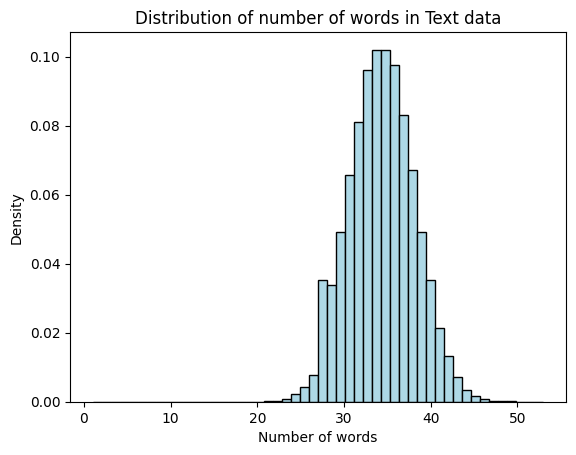

In [ ]:
# plot the df1['clean_text'] histogram with kde option  using matplotlib

plt.hist(df2['text_length'], bins=50, density=True, color="lightblue", edgecolor="black")
plt.xlabel('Number of words')
plt.ylabel('Density')
plt.title('Distribution of number of words in Text data')
plt.show()


## Word count distribution in Headlines data

In [ ]:
df2['summary_length'].describe()

count    98401.000000
mean         6.794230
std          1.105794
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: summary_length, dtype: float64

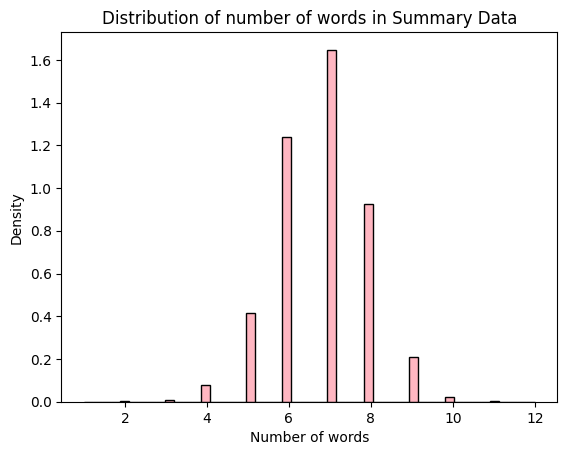

In [ ]:

plt.hist(df2["summary_length"], bins=50, density=True, color="lightpink", edgecolor="black")
plt.xlabel('Number of words')
plt.ylabel('Density')
plt.title('Distribution of number of words in Summary Data')
plt.show()

## Determine the MAX length of the Text data and Summary data

In [ ]:
#Get max length of texts and summaries.

max_text_len = max([len(text.split()) for text in df2['clean_text']])

max_summary_len = max([len(text.split()) for text in df2['clean_headlines']])

print(max_text_len, max_summary_len)

53 12


In [ ]:
cnt=0
for i in df1['clean_headlines']:
    if(len(i.split())<=12):
        cnt=cnt+1
print(cnt/len(df1['clean_headlines']))


1.0


In [ ]:
cnt=0
for i in df1['clean_text']:
    if(len(i.split())<=53):
        cnt=cnt+1
print(cnt/len(df1['clean_text']))

1.0


## Filter the final data based on Max Text Length and Max Summary Length

In [ ]:
max_text_len=53
max_summary_len=12

In [ ]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(df2['clean_text'])
cleaned_summary=np.array(df2['clean_headlines'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df3 =pd.DataFrame({'text':short_text,'summary':short_summary})
df3.head()

,text,summary
0,saurav kant alumnus upgrad iiit program machine learning artificial intelligence systems engineer infosys almost years work experience program upgrad degree career support helped transition data s...,upgrad learner switches career salary hike
1,kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bi...,delhi techie wins free food swiggy one year cred
2,new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march ...,new zealand end rohit sharma led india match winning streak
3,aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental deat...,aegon life iterm insurance plan helps customers save tax
4,speaking sexual harassment allegations rajkumar hirani sonam kapoor said known hirani many years true metoo movement get derailed metoo movement always believe woman case need reserve judgment add...,known hirani yrs metoo claims true sonam


## Adding the START and END special tokens at the beginning and end of the summary namely -- sostok and eostok as START and END tokens

In [ ]:
#Add sostok and eostok at
df3['summary'] = df3['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df3.head()


,text,summary
0,saurav kant alumnus upgrad iiit program machine learning artificial intelligence systems engineer infosys almost years work experience program upgrad degree career support helped transition data s...,sostok upgrad learner switches career salary hike eostok
1,kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bi...,sostok delhi techie wins free food swiggy one year cred eostok
2,new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march ...,sostok new zealand end rohit sharma led india match winning streak eostok
3,aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental deat...,sostok aegon life iterm insurance plan helps customers save tax eostok
4,speaking sexual harassment allegations rajkumar hirani sonam kapoor said known hirani many years true metoo movement get derailed metoo movement always believe woman case need reserve judgment add...,sostok known hirani yrs metoo claims true sonam eostok


## Split our dataset into a training and validation set. We will use 90% of the dataset as the training data and evaluate the performance on the remaining 10% (holdout set):

In [ ]:
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val=train_test_split(np.array(df3['text']),np.array(df3['summary']),test_size=0.1,random_state=0,shuffle=True)

## Preparing the Tokenizer

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

## Rarewords and its Coverage:

Let us look at the proportion rare words and its total coverage in the entire text

Defining the threshold to be 4 which means word whose count is below 4 is considered as a rare word

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 57.38882302666042
Total Coverage of rare words: 2.0494723471135456


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 30912


## Summary Tokenizer

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

## Rarewords and its Coverage

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)


% of rare words in vocabulary: 65.18921721099015
Total Coverage of rare words: 4.960497577724049


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(88560, 88560)

## We will now remove "Summary" i.e Y (both train and val) which has only START and END

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

## Model building

In [ ]:
from keras import backend as K
import gensim
from numpy import *
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Size of vocabulary from the w2v model = 30912
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 53)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 53, 200)      6182400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 53, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

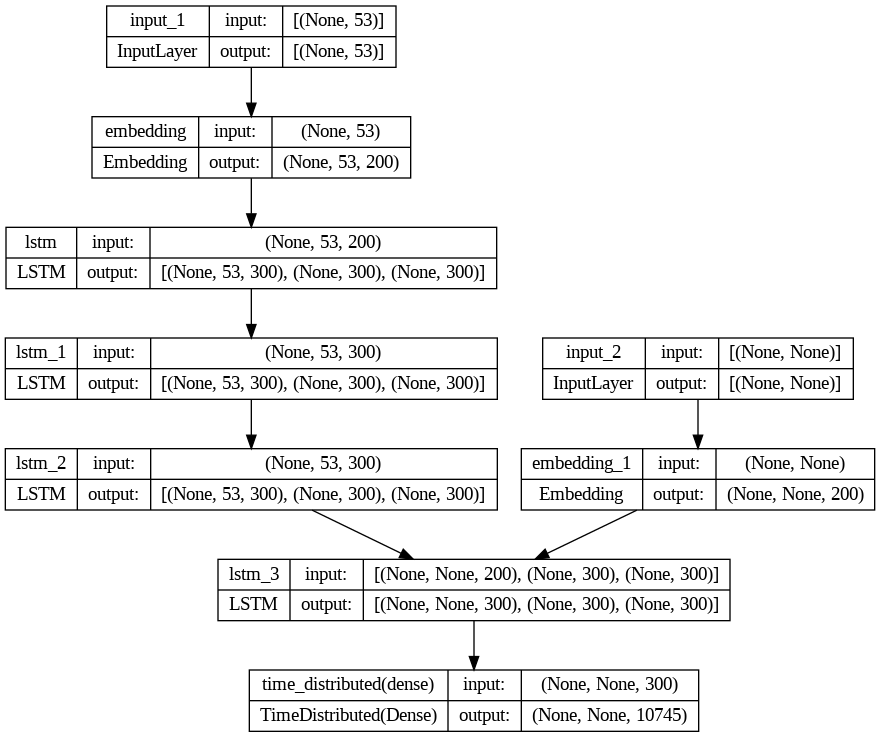

In [ ]:
import keras.utils.vis_utils
from tensorflow import keras
from tensorflow.keras.utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
692/692 [==============================] - 417s 602ms/step - loss: 4.8852 - val_loss: 4.8142
Epoch 2/50
692/692 [==============================] - 408s 589ms/step - loss: 4.8699 - val_loss: 4.8009
Epoch 3/50
692/692 [==============================] - 406s 586ms/step - loss: 4.8321 - val_loss: 4.7135
Epoch 4/50
692/692 [==============================] - 411s 595ms/step - loss: 4.7150 - val_loss: 4.6254
Epoch 5/50
692/692 [==============================] - 409s 592ms/step - loss: 4.6025 - val_loss: 4.4682
Epoch 6/50
692/692 [==============================] - 407s 588ms/step - loss: 4.4575 - val_loss: 4.3479
Epoch 7/50
692/692 [==============================] - 407s 588ms/step - loss: 4.3102 - val_loss: 4.2225
Epoch 8/50
692/692 [==============================] - 403s 582ms/step - loss: 4.1834 - val_loss: 4.1179
Epoch 9/50
692/692 [==============================] - 410s 593ms/step - loss: 4.0610 - val_loss: 4.0159
Epoch 10/50
692/692 [==============================] - 403s 582m

## Model Evaluation

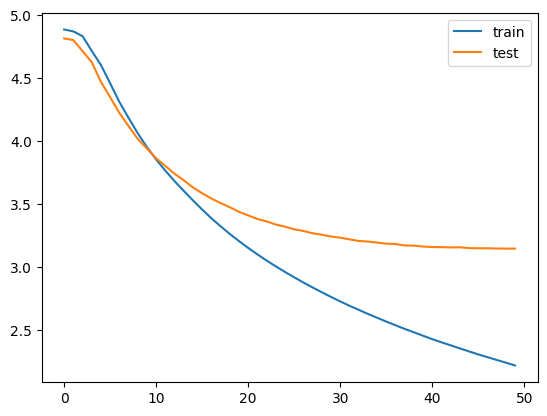

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Build the dictionary to convert the index to word for target and source vocabulary:

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

## Inference -- Set up inference for the encoder and decoder

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


## Implementation of the inference process

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
          sampled_token_index = 1
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

## Convert an integer sequence to a word sequence for summary as well as Text

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

## Summaries generated by the model:

In [ ]:
for i in range(0,100):
    print("Text:",seq2text(x_tr[i]))
    print("Original Headline:",seq2summary(y_tr[i]))
    print("Predicted Headline:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Text: president donald trump level trust russia deteriorated russian president vladimir putin said comes launched missile strike russian ally syria response chemical attack russia said strike amounted aggression sovereign nation violation international law 
Original Headline: trust russia trump putin 
1/1 [==============================] - 0s 24ms/step
Predicted Headline:  trump russia calls putin russia


Text: indian american billionaire founder therapeutics john kapoor resigned company board days arrested charges bribery accused bribing doctors prescribe firm opioid painkillers also resigned chairman director generic drugmaker 
Original Headline: indian american billionaire resigns bribe case 
1/1 [==============================] - 0s 24ms/step
Predicted Headline:  billionaire founder resigns billionaire


Text: britain biggest arms company bae secretly sold mass surveillance technology six middle eastern governments criticised citizens reports said technology used spy huge number p